## Exercise 5

**Keito Watanabe (s6kewata),
Haveesh Singirikonda (s6gusing)**

Problem 2 (MH with Gaussian model)

**See (attempts in) Problem 1 in end of PDF**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def H(a,U):
    '''Iterates from 1 to N-1 with array of length N'''
    ham = 0
    
    for i in range(1, len(U)):
        
        ham = ham + (U[i]-U[i-1])**2
        
    return ham/a

In [3]:
def MH(a,N,du, Ns):
    '''Metropolis-Hastings '''
    mag_arr = np.zeros(Ns)
    mag2_arr = np.zeros(Ns)
    en_arr = np.zeros(Ns)
    
    # take  N+1 array since we have points from 0 to N 
    U_0 = np.zeros(N+1)
    
    for n in range(Ns):
        
        U_0[0] = 0
        U_0[N] = 0
        
        x = np.random.randint(1,N-1)

        r = np.random.uniform(-1,1)

        U_new = U_0

        U_new[x] = U_0[x] + r*du

        dH = H(a,U_new) - H(a,U_0)
    
        dP = np.exp(-dH)

        r_MH = np.random.uniform(0,1)

        if dP > 1:
            U_0 = U_new
        
        if dP > r_MH:
            U_0 = U_new
            
        # evaluate observables here
        mag_arr[n] = (np.sum(U_0[1:-2]) / N)
        mag2_arr[n] = (np.sum(U_0[1:-2]) / N)**2.
        en_arr[n] = H(a,U_0)
            
    return mag_arr, mag2_arr, en_arr

In [14]:
N = 64
a = 1
d = 2.
Ns = 3000

mag_arr, mag2_arr, en_arr = MH(a,N,d, Ns)

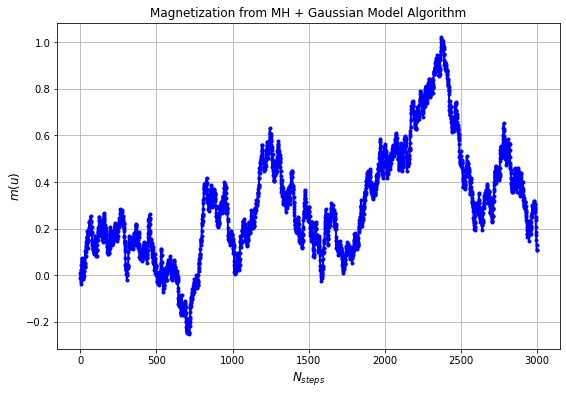

In [15]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(mag_arr, marker="o", ms=3.0, lw=2.0, color="b", label="$m$")

ax.set_xlabel(r"$N_{{steps}}$", fontsize=12)
ax.set_ylabel(r"$m(u)$", fontsize=12)
ax.set_title("Magnetization from MH + Gaussian Model Algorithm")

ax.grid()

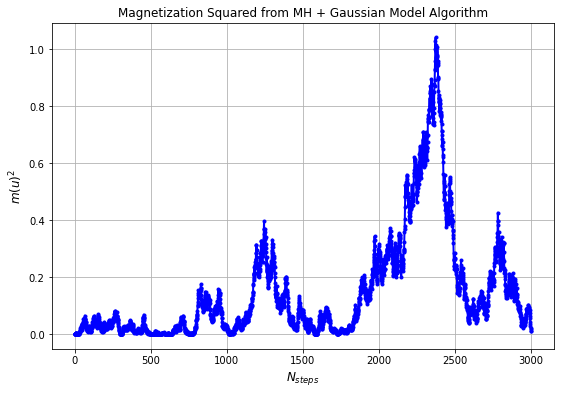

In [16]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(mag2_arr, marker="o", ms=3.0, lw=2.0, color="b", label="$m^2$")
# n_arr = np.arange(N)
# ax.plot((n_arr-1)/n_arr**(N-1))

ax.set_xlabel(r"$N_{{steps}}$", fontsize=12)
ax.set_ylabel(r"$m(u)^2$", fontsize=12)
ax.set_title("Magnetization Squared from MH + Gaussian Model Algorithm")

ax.grid()

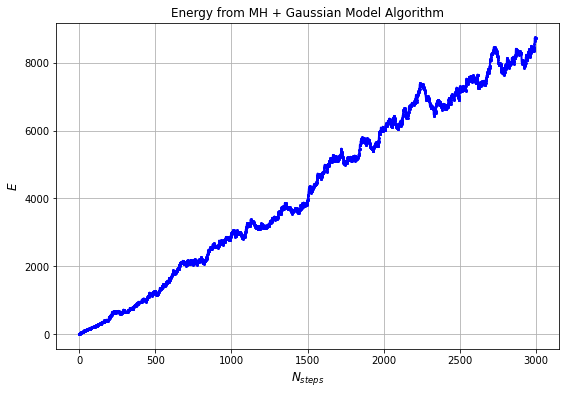

In [17]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(en_arr, marker="o", ms=2.0, lw=2.0, color="b", label="$E$")

ax.set_xlabel(r"$N_{{steps}}$", fontsize=12)
ax.set_ylabel(r"$E$", fontsize=12)
ax.set_title("Energy from MH + Gaussian Model Algorithm")

ax.grid()

Some questions: Why is the magnetization varying so much with each iteration? Why is the energy increasing?

Problem 4 (Coarsening)

**Refer to the end of the PDF for Q3**

In [ ]:
def H_new(u,a,phi):
    '''Generalized Hamiltonian'''
    
    ham1 = 0
    ham2 = 0
    
    for i in range(len(u)-1):
        
        ham1 = ham1 + (u[i+1]-u[i])**2
        ham2 = ham2 + phi[i]*u[i]
        
    return ham1/a + a*ham2

def coarse(u,a,phi):
    '''Restriction function'''
    
    Nu = len(u)
    
    Nu2 = int(Nu//2)
    
    u2 = np.ones(Nu2)
    phi2 = np.ones(Nu2)
    
    for i in range(1,Nu2-1):
        
        u2[i] = u[2*i]        

        phi2[i] = 0.5*(0.5*phi[int(2*i-1)]+phi[int(2*i)]+0.5*phi[int(2*i+1)])
    
    phi2[0] = 0.5*(phi[0]+0.5*phi[1])
    u2[0] = 0
    u2[Nu2-1] = 0
    phi2[Nu2-1] = 0.5*(0.5*phi[2*Nu2-2] + phi[2*Nu2-1])
    
    return u2,2*a,phi2

def uncoarse(u,a,u_in):
    '''Prolongation function'''
    Nu = len(u)
    Nu2 = 2*Nu
    u_half = np.ones(Nu2)
    
    # zeroth index and Nth index already defined to be zero
    for i in range(1, Nu2-1):
        if i%2==0:
            # there is a bug in here that we cannot solve ;(
            u_half[i] =  u_in[i] + u[i//2]
            
        else:
            u_half[i] =  u_in[i] + 0.5*(u[(i-1)//2] + u[(i+1)//2])
            
    # set Dirichlet BC again
    u_half[0] = 0
    u_half[Nu2-1] = 0
    
#     u_half[Nu2-1] = u_in[Nu2-1] + u[Nu2//2-1]
            
    return u_half, a/2            

In [ ]:
def MH_new(U_0,a,du,Ns,phi):
    
    N = len(U_0)
    U_s = np.ones((Ns,N))
    
    for n in range(Ns):
        
        # set BC by Dirichlet BC
        U_0[0] = 0
        U_0[N-1] = 0
        
        x = np.random.randint(1,N-1)

        r = np.random.uniform(-1,1)

        U_new = U_0

        U_new[x] = U_0[x] + r*du

        dH = H_new(U_new,a,phi) - H_new(U_0,a,phi)
    
        dP = np.exp(-dH)

        r_MH = np.random.uniform(0,1)

        if dP>1:
            U_0 = U_new
        
        if dP > r_MH:
            U_0 = U_new
        
        U_s[n,:] = U_0
            
    return U_s

In [ ]:
# test coarsening, this should half the field array 
# u1 = np.linspace(1,10,20)
u1 = np.zeros(20)
phi1 = np.ones(20)
a = 4

u2,a2,phi2 = coarse(u1,a,phi1)
phi1,phi2, a2

In [ ]:
# test uncoarsening, this should double the lenght of the field array
u_ini = np.zeros(20)
u = np.linspace(0,9,10)
a = 4

u_h, a2 = uncoarse(u,a,u_ini)
u,u_h, a2

In [ ]:
def multi_grid(u_in,a_in,phi_in,l,g,n_pre,du,n_post,N_mh):
   '''Multigrid algorithm'''
    # u_in = initial config of u
    # a_in = initial coarsation
    # phi_in = phi in initial level
    # l = number of levels
    # g = gamma
    # n_pre = pre coarsational MH runs
    # n_post = post coarsational MH runs
    # du = for MH
   
    # pre-coarsening
    U_s = MH_new(u_in,a,du,n_pre,phi_in)
   
    # the precoarsened field
    u_pre = U_s[n_pre-1,:]
   
#     print(len(u_pre), u_pre.size)
   
    # max(coarsening) ==  when external field is described by 1 grid
    if len(u_pre)==1:
       
        U_pro = MH_new(u_pre,a,du,n_post,phi_in)
       
        return U_pro[n_post-1,:]

    # Initialising a list to store the value of the external field 'phi' at each level.
    # A array cannot be used as each level as different dimensions for phi.
    # So in this, phi_l[l] would be equal to the field phi at level 'l'
    phi_l = []
   
    # Initialising a temporary variable to store the value of u for the initial step.
    # This is updated every step through the coarsening (or uncoarsening later on)
    # Similar to the previous case, a list is initialised to store the values of initial values of u for each level
    # This is done, as we need to update the values of u for each uncoarsening.
    # So this list would help while uncoarsening to a particular layer, when the value of u would be updated
    u_temp = u_pre
    ini = []
   
    # Initialising the value of 'a'
    a_temp = a_in
   
    # Initialising the value of field phi.
    # Creating a temporary variable as well, which can be used to get the value of the field after coarsening
    phi_temp = phi_in
   
   
    # Updating the list 'ini' with the value of u at the initial level
    ini.append(u_temp)
   
    # Updating the list 'phi_l', with the value of phi for the first level
    phi_l.append(phi_temp)
   
    # going 'l' layers deep
    for i in range(l):
       
#         u_temp, a_temp, phi_l[l+1] = coarse(u_temp,a_temp,phi_l[l])
        u_temp, a_temp, phi_temp = coarse(u_temp,a_temp,phi_temp)
        ini.append(u_temp) # Updating the list 'ini' with the u for this level
        phi_l.append(phi_temp) # Updating the list 'phi_l' with the field of phi for this level
       
    # starting the multigrid cycle for a value of gamma (g)
    # following the steps given in the lecture notes
    # from what we understood,
    # we follow a path given in the figure in Slide 11 in the lecture 'Approaching infinity, simulationally speaking'
    for j in range(1,g):
    #  we cover every level below g, so that is why we take a for loop from 1 to g.  
        for k in range(j):
            # This for loop is to uncoarse up to level j
            # Meanwhile the respective elements of 'ini' get updated with the new values of u
            u_temp,a_temp = uncoarse(u_temp,a_temp,ini[l-k])
            ini[l-k] += u_temp
       
        # After the level of j is reached, we do a Metropolis-Hastings (MH) run for N_mh samples
       
        U_tmp = MH_new(u_temp,a_temp,du,N_mh,phi_l[l-j])
       
        # The last point of this MH cycle would give us the latest value for u, which is again updated
        u_temp = U_tmp[N_mh-1,:]
        ini[l-j] = u_temp
       
        # After the MH run, we coarsen it back and go back to the last level
        for k in range(j):
           
            u_temp,a_temp,phi_temp = coarse(u_temp,a_mp,phi[l-j+(k+1)])
   
    # The above operations would be repeated until j= gamma.
   
    # As given in the lecture slides, we would like to do the similar cycles again for the lower levels,
    # in descending order (i.e, upto g-1, g-2) until we reach the deepest level l again.
    # Similar to the previous case, we run a MH cycle at each level and update the u in the list 'ini'
    for j in range(1,g-1)[::-1]:
       
        for k in range(j):
           
            u_temp,a_temp = uncoarse(u_temp,a_temp,ini[l-k])
            ini[l-k] += u_temp
           
        U_tmp = MH_new(u_temp,a_temp,du,N_mh,phi_l[l-j])
       
        u_temp = U_tmp[N_mh-1,:]
       
        for k in range(j):
           
            u_temp,a_temp,phi_temp = coarse(u_temp,a_mp,phi[l-j+(k+1)])
   
    # After the multigrid iterative cycles are done (for gamma), we uncoarsen the it back to the initial level.
    for i in range(l+1):
       
        u_temp, a_temp = uncoarse(u_temp,a_temp,ini[l-i])
        ini[l] += u_temp
   
    # u_first would be the value of u now at the initial level.
    u_first = ini[0]
   
    # After the multigrid cycle is finished, we run another Metropolis Hastings cycle for n_post samples.
    U_pro = MH_new(u_first,a,du,n_post,phi_in)
   
    # The last chain is returned, which is the result of the Multigrid algorithm
    return U_pro[n_post-1,:]

In [ ]:
def autocorr(m2, tau):
    '''Normalized autocorrelation function'''
    N = len(m2)
    m2bar = np.mean(m2)
    
    gamma_arr = [] 
    
    if tau!= 0:
        for k in range(N-tau):

            l = k + tau

            gamma_arr.append( (m2[k] - m2bar) * (m2bar - m2[l]))

            temp_k = l
            temp_l = k

            gamma_arr.append( (m2[temp_l] - m2bar) * (m2bar - m2[temp_k]))
            
    if tau==0:
        
        for i in range(N):
            gamma_arr.append( (m2[i] - m2bar) * (m2bar - m2[i]))
        
        
    # take the average of gamma_arr
    gamma = np.sum(np.array(gamma_arr)) / len(gamma_arr)
    
    return gamma

In [ ]:
# test
# u_ini = np.linspace(1,20,10)
u_ini = np.zeros(20)
phi_ini = np.ones(20)
a = 1
l = 2
g = 1

n_pre = 100
n_post = 100
N_MH = 100
du = 2.

# this part still does not work...
u_multi = multi_grid(u_ini,a,phi_ini,l,g,n_pre,du,n_post,N_mh)


In [ ]:
l = 3   # number of levels
du = 2.  
N = 64   # number of lattice points

# n_pre = [4,2,1]
# n_post = [4,2,1]
N_MH = 100

Ns = 100

u_ini = np.zeros(N)
phi_ini = np.ones(N)

cycles = [1,2]
mag2_arr = np.zeros(Ns)
tau = np.arange(0,Ns,step=20)
autocorr_arr = np.zeros((2,Ns))

# evaluate m^2 and the autocorrelation function for the different cycles

# since we have no idea how the implementation works with algorhtm, we set
# n_pre and n_post to be fixed. Sorry about this...

# here we will simply highlight what would be done if the bugs were fixed.
n_pre = 4
n_post = 4
for j, g in enumerate(cycles):
    
    # need an additional for loop here that iterates over each iteration
    for i in range(Ns):
        u_multi = multi_grid(u_ini,a,phi_ini,l,g,n_pre,du,n_post,N_MH)
        mag2_arr[i] = (np.sum(u_multi[1:-2]) / N)**2.
    
    # evaluate autocorrelation function
    C0_1 = autocorr(mag2_arr, 0)

    for i in range(len(tau_arr)):
        autocorr_arr[j, i] = autocorr(mag2_arr, tau_arr[i]) 
    
    autocorr_arr[j, :] /= C0_1

In [ ]:
# plot autocorrelation function with m^2 vs tau
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(tau_arr,autocorr_arr[1,:],marker='o',label='$\gamma = 1$', ms=2.0)
ax.plot(tau_arr,autocorr_arr[2,:],marker='o',label='$\gamma = 2$', ms=2.0)

ax.set_xlabel(r"$\tau$", fontsize=14)
ax.set_ylabel(r"$C(\tau) = \bar\Gamma^{{(m^2)}}(\tau)   /   \bar\Gamma^{{(m^2)}}(0)$", fontsize=14)
ax.set_title("Estimator for Normalized Autocorrelation function")
ax.grid()
ax.legend()

Below is the obsolete / WIP code (i.e. our attempts). Please forgive us for leaving this in the PDF as well, we will leave this here so that we can explore our mistakes if we have the time later on.

In [ ]:
# def mgrid_cycle(u_i, a, phi_i, level, n_cycles, du, N_MH, n_pre=100, n_post=100):
#     '''
#     Performs the recursive step at a current level.
    
#     Parameters:
#     - u_i : the initial field (u_tilde in notes) at this level
#     - a: the lattice spacing == coarsation at this level
#     - phi_i: the external field at this level
#     - n_cycles: gamma in notes, number of multigrid cycles
#     - du: interval used in MH step
#     - N_MH: number of MH steps in each cycle
#     - n_pre: number of precoarsening steps for MH
#     - n_post: number of post-prolongation steps for MH
    
#     '''
    
#     # pre-coarsening
#     # get array of (Ns, len(u_in))
#     U_s = MH_new(u_i,a,du,n_pre,phi_i)
    
#     # the precoarsened field
#     # take last element of field value
#     u_pre = U_s[-1,:]
    
#     # max(coarsening) ==  when external field is described by 1 grid
#     # then perform post prolongation step immediately
#     if len(u_pre)==1:
#         U_pro = MH_new(u_pre,a,du,n_post,phi_in)
#         return U_pro[-1,:]
    
#     # perform coarsening
#     u = u_pre
#     a = a
#     phi = phi_i
    
#     # containers to keep field and lattice sizes
#     # for each level
#     mg_level_list = []
    
#     # go n_cycles levels deep 
#     for nl in range(level):
# #         print(phi)
#         u, a, phi = coarse(u, a, phi)
#         mg_level_list.append((u, a, phi))
    
#     # perform multigrid MH step 
#     # i.e. from lowest level, uncoarse -> MH -> coarse
#     # for gamma > 1, this happens in a symmetric fashion
    
#     # for gamma == 1, MH -> uncoarsen up to the finest level
#     if n_cycles == 1:
#         # perform MH at lowest level
#         u_l, a_l, phi_l = mg_level_list[-1]
#         u_l_MH = MH_new(u_l,a_l,du,N_MH,phi_l)[-1,:]
        
# #         print(u_l_MH.size)
        
#         # now uncoarsen
#         u_unc = u_l_MH
#         a_unc = a_l
#         # iterate backwards since we want to access the 
#         # finer field values
#         for nl in range(level):
#             u_tilde = mg_level_list[level-nl][0]
#             u_unc, a_unc = uncoarse(u_unc, a_unc, u_tilde)
        
#         # final field given by uncoarsened u
#         u_f = u_unc
        
#     else:  # then do multigrid cycle recursion in symmetric fashion
#         pass
    
# #     print(u_f.size)
    
#     # perform post-prolongation step
#     # can use a, phi from initial state since
#     # we are back at the initial level
#     U_pro = MH_new(u_f,a,du,n_post,phi_i)
    
#     return U_pro[-1,:]
    
# #     for nc in range(1, n_cycles):
# #         # perform uncoarsening / coarsening depending on 
# #         # n_cycles
# #         for nc_unc in range(nc):   
# #             # first uncoarsen
# #             u_unc, a_unc = uncoarse()
    
# #     # perform MH step at each level going upwards,
# #     # starting from the lowest level in multigrid cycle
# #     for nc in range(n_cycles, step=-1):  # start from lowest level
# #         u_l, a_l, phi_l = mg_level_list[nc]
        
# #         u_l_MH = MH_new(u_l,a_l,du,N_MH,phi_l)[-1,:]
        
# #         u_temp, a_temp = uncoarse(u_temp,a_temp,ini[l-i])
        


    

In [ ]:
# def multigrid(u_init, a, phi_init, nlevels, mgcycle_params, n_pre, n_post):
#     '''
#     Multigrid algorithm, iterates for nlevels and returns
#     field values evaluated for each level
#     '''
#     n_cycles, du, N_MH = mgcycle_params
    
#     u_arr = np.zeros((nlevels, len(u_init)))
    
#     for i, level in enumerate(range(1, nlevels+1)):
#         u_arr[i, :] = mgrid_cycle(u_init, a, phi_init, level, n_cycles, \
#                                   du, N_MH, n_pre[i], n_post[i])
#     return u_arr
    

In [ ]:
# # test
# # u_ini = np.linspace(1,20,10)
# u_ini = np.zeros(20)
# phi_ini = np.ones(20)
# a = 1
# l = 2
# g = 1

# n_pre = 100
# n_post = 100
# N_MH = 100
# du = 2.

# # mgrid_cycle(u_ini, a, phi_ini, l, g, du, N_MH, n_pre=100, n_post=100)
# # u_multi = multi_grid(u_ini,a,phi_ini,l,g,n_pre,du,n_post,N_mh)

# mgcycle_params = (g, du, N_MH)

# multigrid(u_ini,a,phi_ini, l, mgcycle_params, n_pre=[4,2,1], n_post = [4,2,1])

In [ ]:
# u_ini = np.zeros(128)
# phi_ini = np.ones(128)
# a = 1
# l = 2
# g = 1

# n_pre = 100
# n_post = 100
# N_MH = 100
# du = 2.

# multi_grid(u_ini,a,phi_ini,l,g,n_pre,du,n_post,N_MH)